<a href="https://colab.research.google.com/github/AnshHarjai/Sentiment-Analysis-in-HealthCare/blob/main/LGBM_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:200%; color:navy;"><i><b>Import Required Libraries and Load Dataset</b></i></h1>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = "/content/drive/MyDrive/medicine_dataset/drugsComTrain_raw.csv"
test = "/content/drive/MyDrive/medicine_dataset/drugsComTest_raw.csv"
df = pd.read_csv(train)
test = pd.read_csv(test)

In [ ]:
# as both the dataset contains same columns we can combine them for better analysis

data = pd.concat([df, test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


<h1 style="font-size:200%; color:navy;"><i><b>Descriptive Statistics</b></i></h1>

In [ ]:
# describing the data

data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
# taking out information from the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [ ]:
# get the datatype of columns

data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [ ]:
# checking if the data contains any NULL values

data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><i><b style="color:orange;">DATA VISUALIZATION</b></i></h1></center>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF DRUG NAMES / RATINGS / CONDITIONS</b></i></h1>

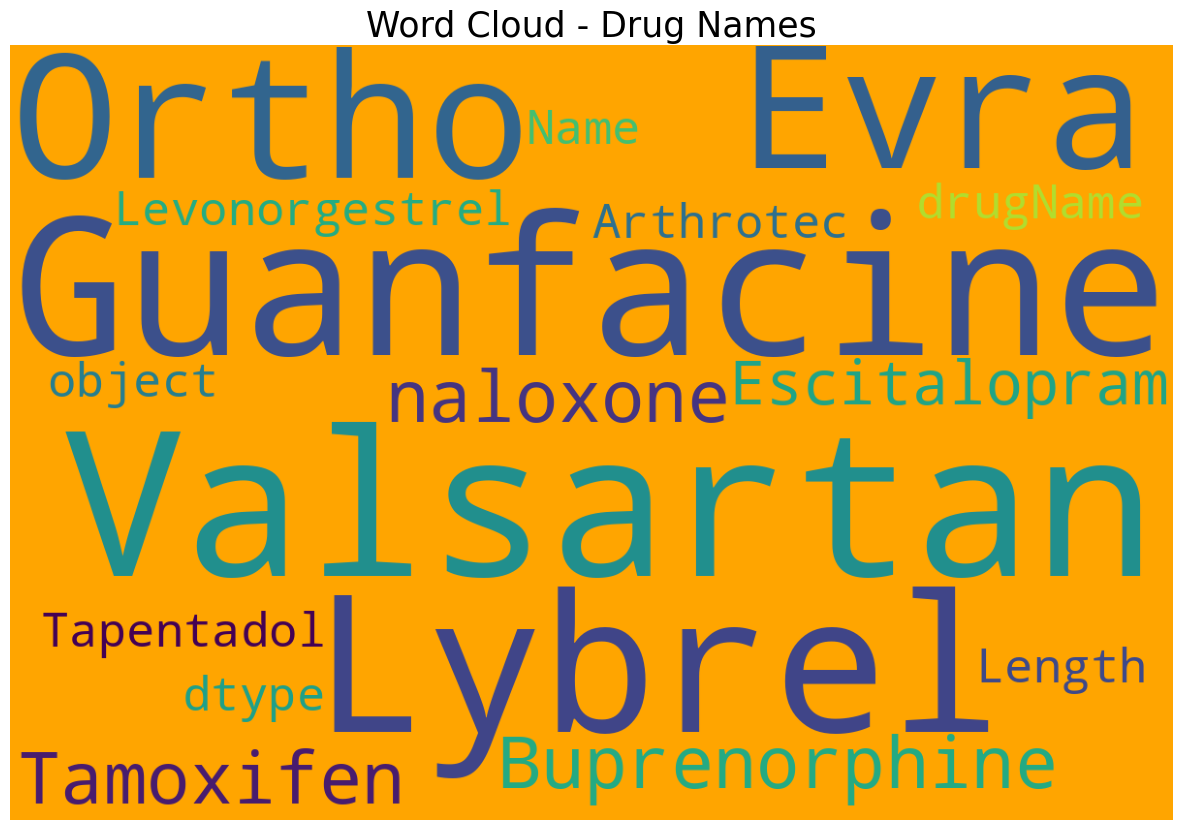

In [ ]:
# let's see the words cloud for the reviews

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the DRUG NAMES </li>
<ul>

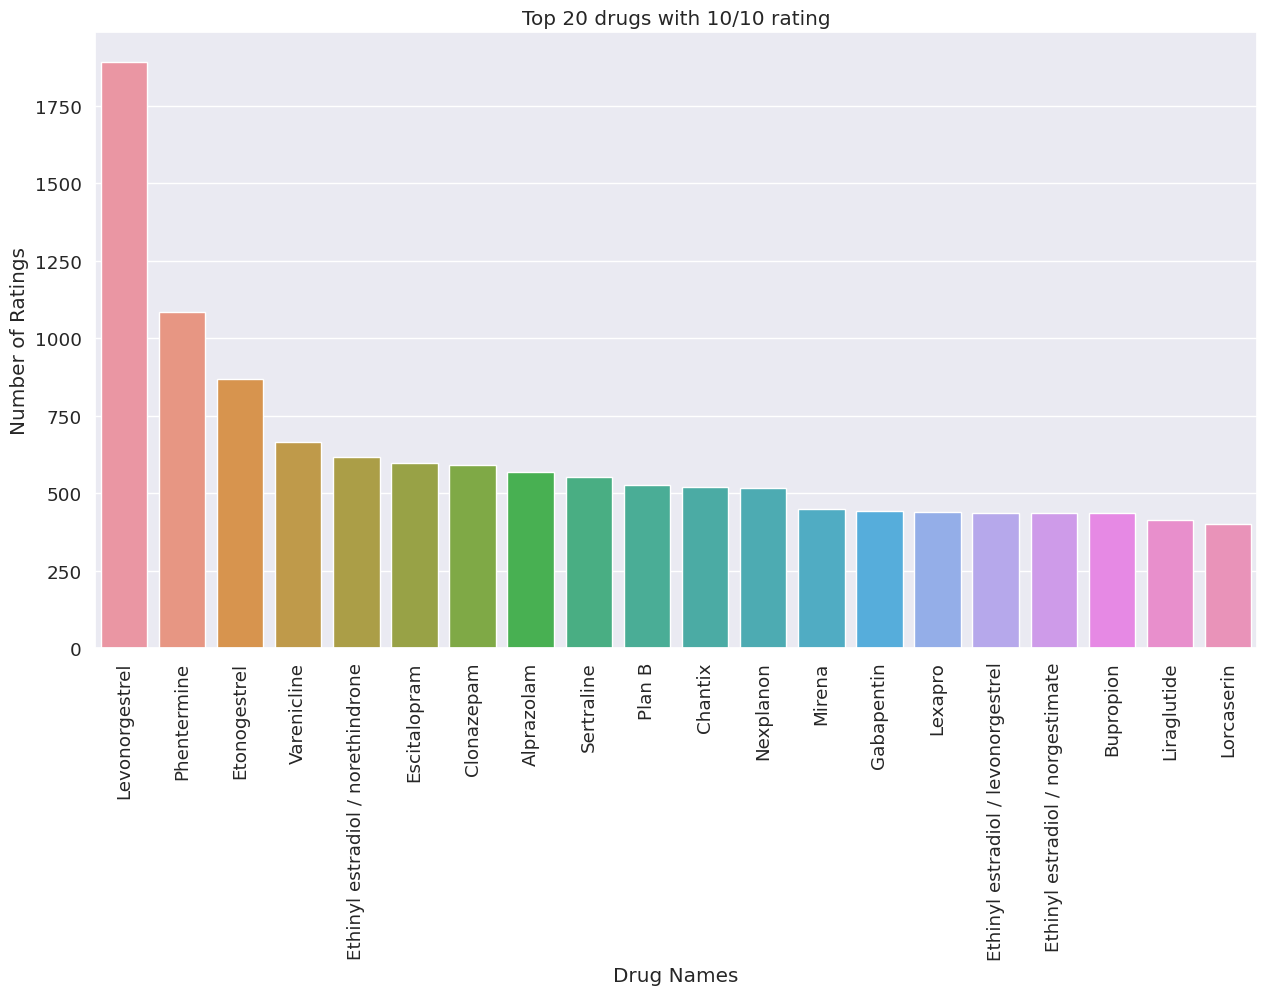

In [ ]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ul>
    <li style="font-size:150%;">The is a bar graph which shows the top 20 drugs given in the data set with a rating of 10/10. 'Levonorgestrel' is the drug with the highest number of 10/10 ratings, about 1883 Ratings in the data set for 'Levonorgestrel'. </li>
<ul>

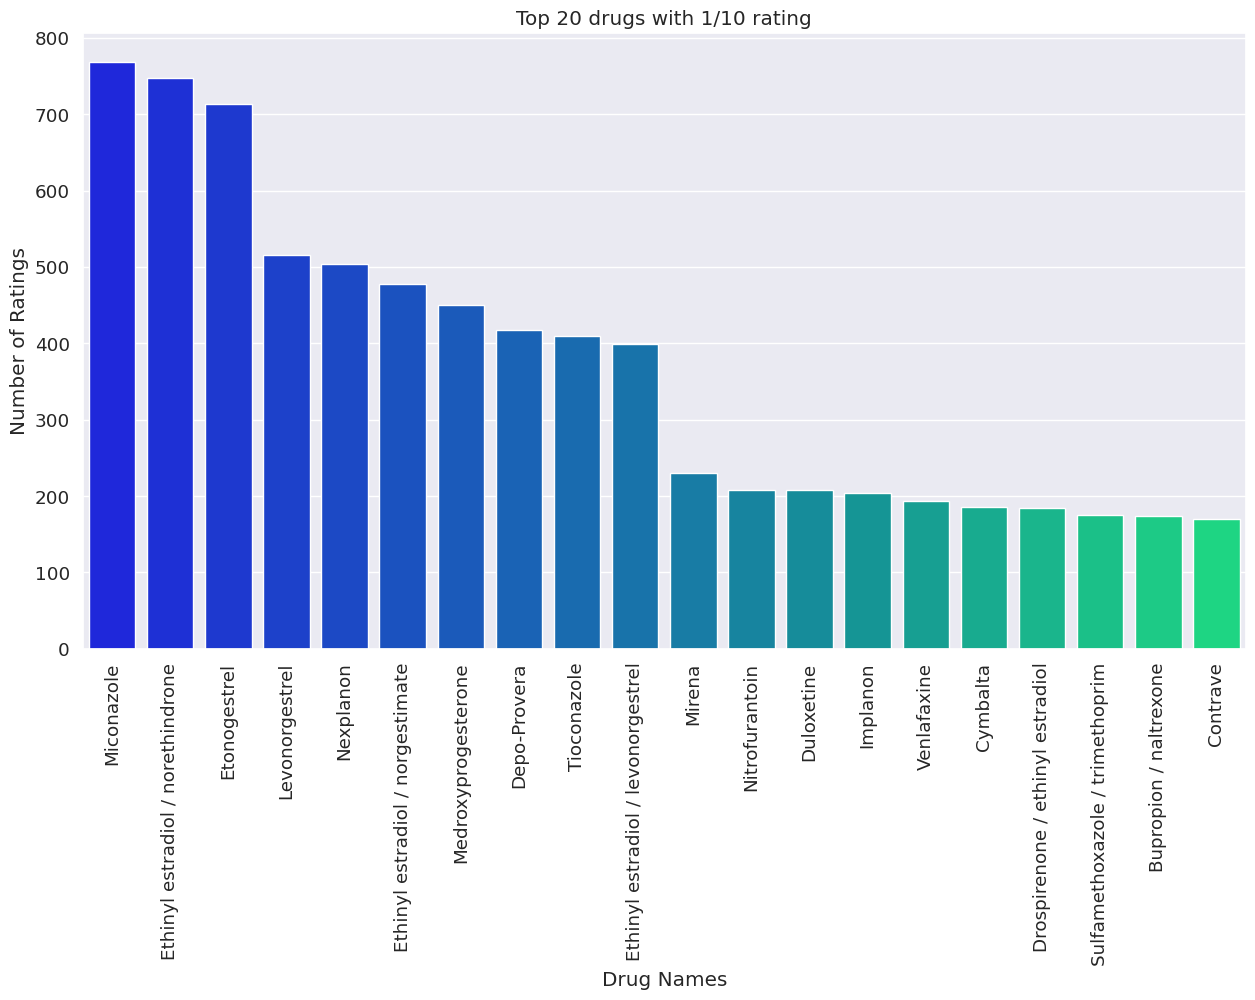

In [ ]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ul>
    <li style="font-size:150%;">The is a bar graph thatshows the top 20 drugs given in the data set with a rating of 1/10. 'Miconazole' is the drug with the highest number of 1/10 ratings, about 767. </li>
<ul>

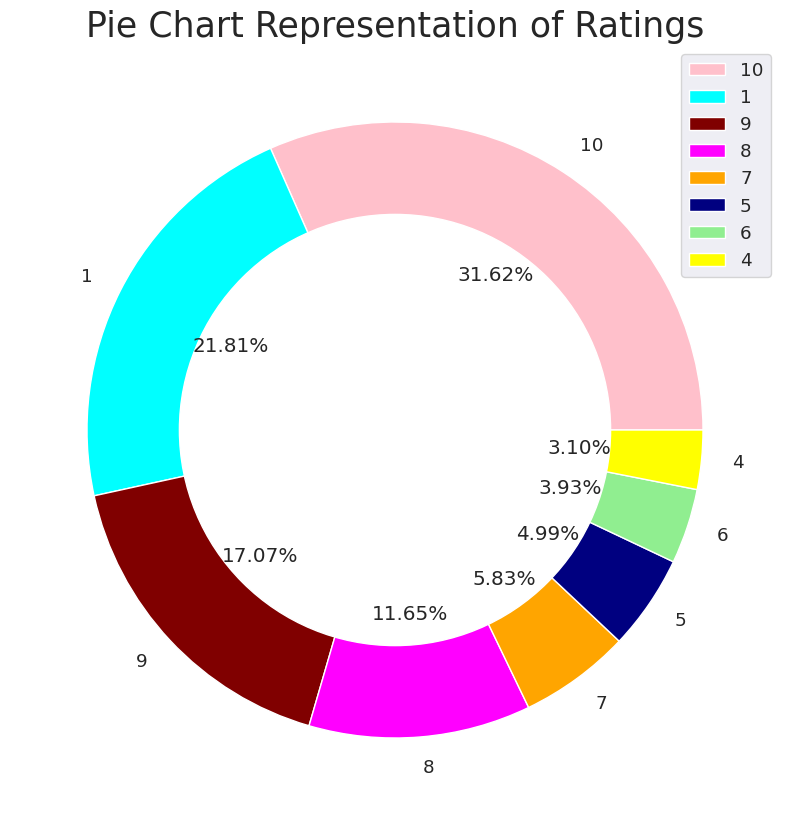

In [ ]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

<ul>
    <li style="font-size:150%;">This Pie Chart reprents the Rating of Reviews. </li>
<ul>

In [ ]:
print(data['rating'])

0         9
1         8
2         5
3         8
4         9
         ..
53761    10
53762     9
53763     8
53764     1
53765     9
Name: rating, Length: 215063, dtype: int64


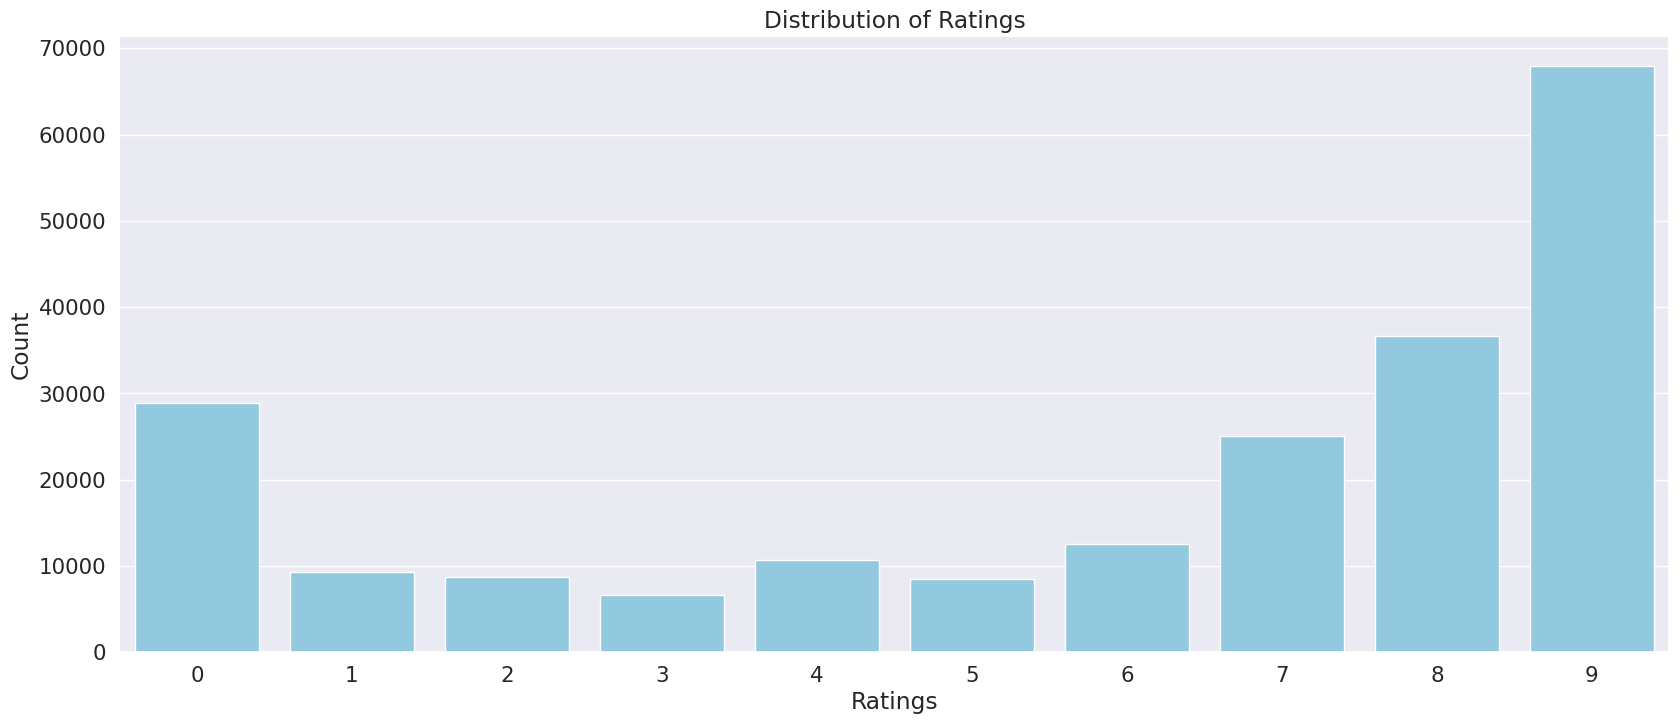

In [ ]:
ratings_labels = np.arange(10)  # Array with values 0 to 10

sns.countplot(data=data, x='rating', color = 'skyblue')
plt.xticks(ticks=np.arange(10), labels=ratings_labels)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

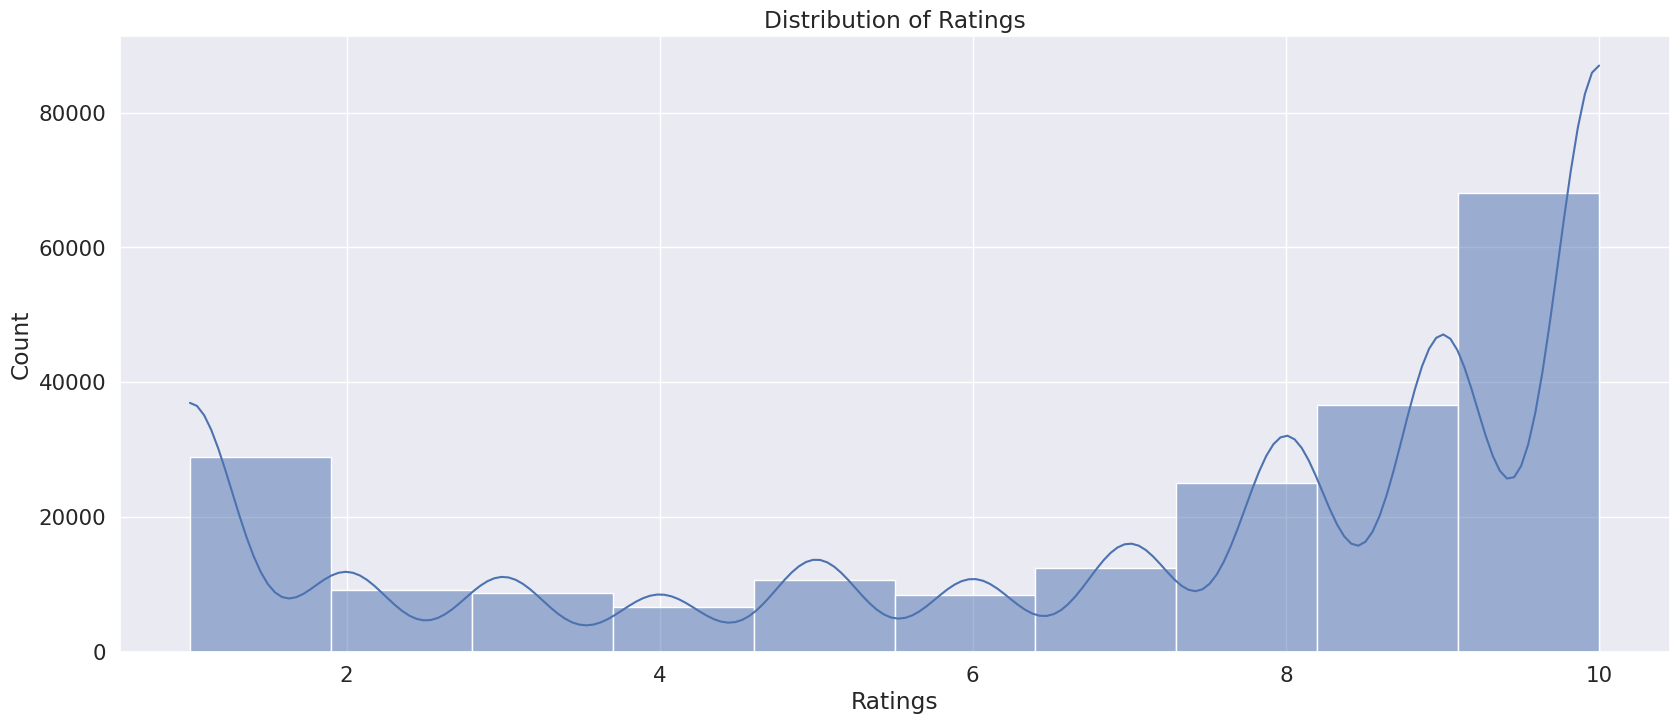

In [ ]:
# A countplot of the ratings so we can see the distribution of the ratings
sns.distplot(data['rating'], bins=10, kde=True)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

<ul>
    <li style="font-size:150%;">The shows a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set.</li>
<ul>

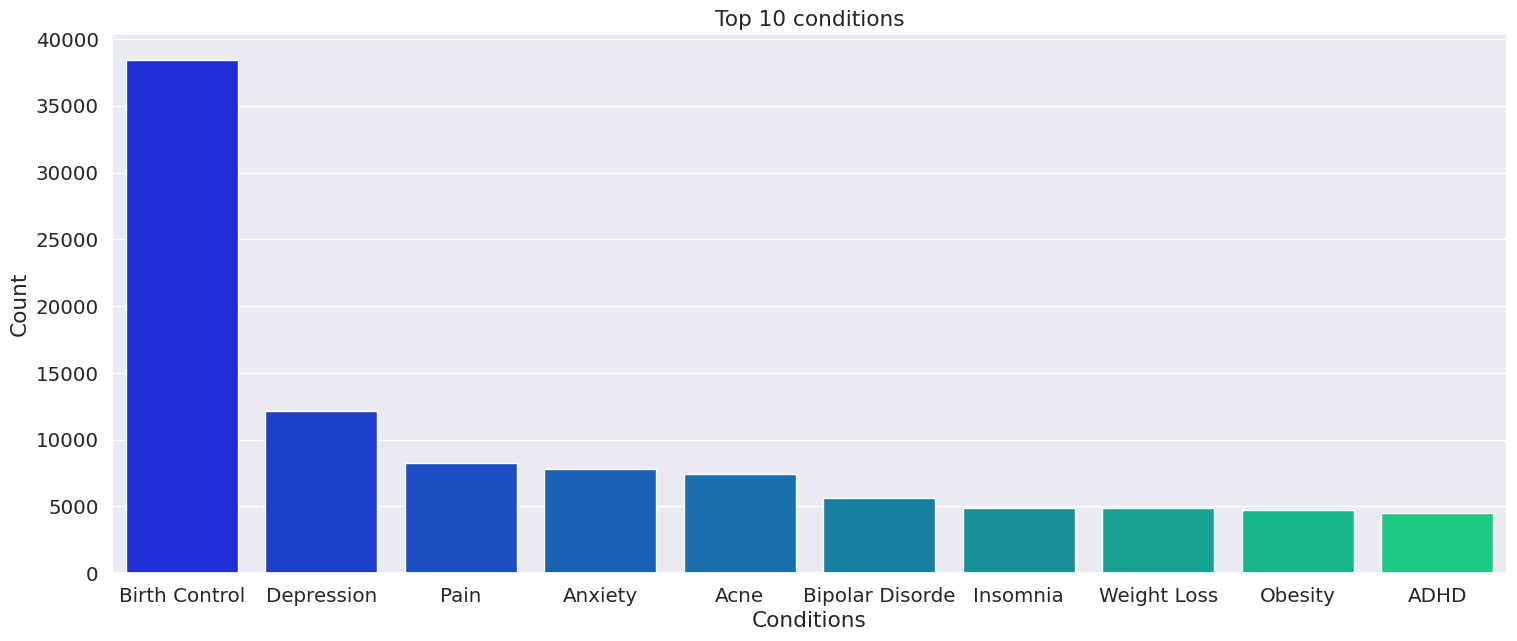

In [ ]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

<ul>
    <li style="font-size:150%;">The is a bar graph which exhibits the top 10 conditions the people are suffering from. In this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and pain.</li>
<ul>

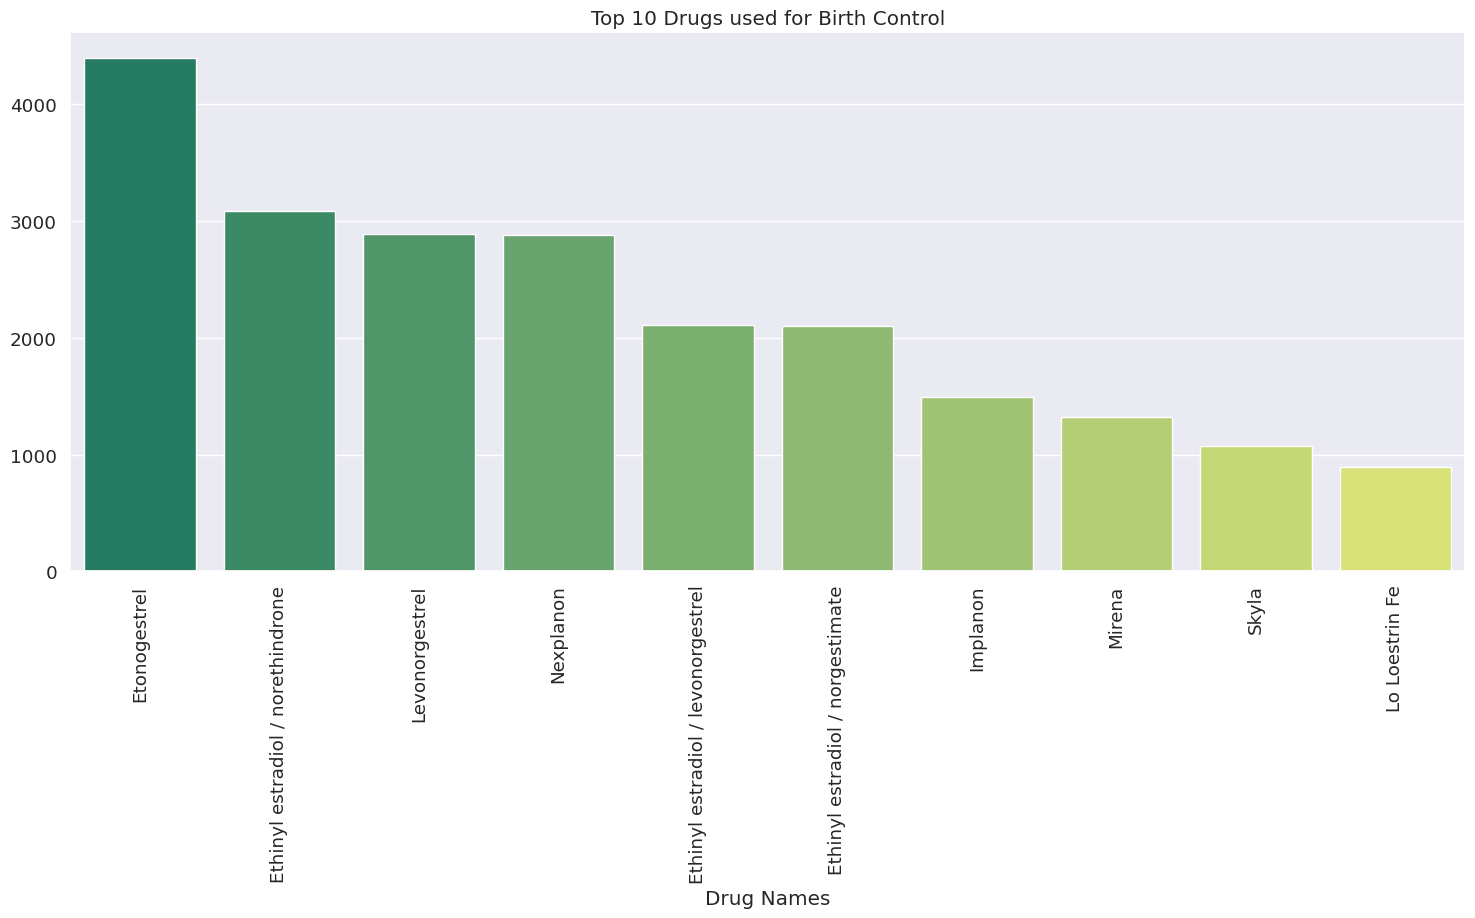

In [ ]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<ul>
    <li style="font-size:150%;">The is a bar graph which exhibits the top 10 drug names for the people suffering from Birth Control. In this data set 'Etonogestrel' is the most prominent drug by a very big margin.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF REVIEWS</b></i></h1>

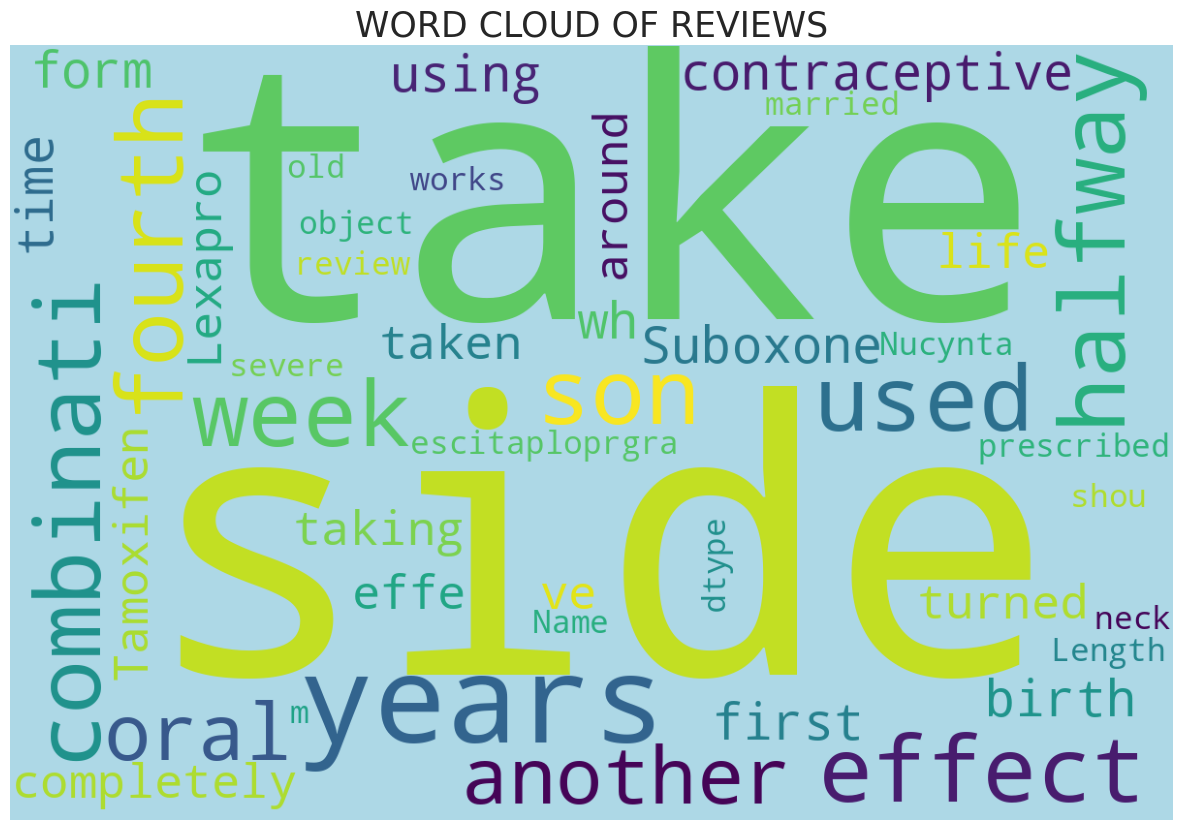

In [ ]:
# let's see the words cloud for the reviews

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the reviews.</li>
<ul>

In [ ]:
# feature engineering
# let's make a new column review sentiment

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Review_Sentiment, dtype: int64

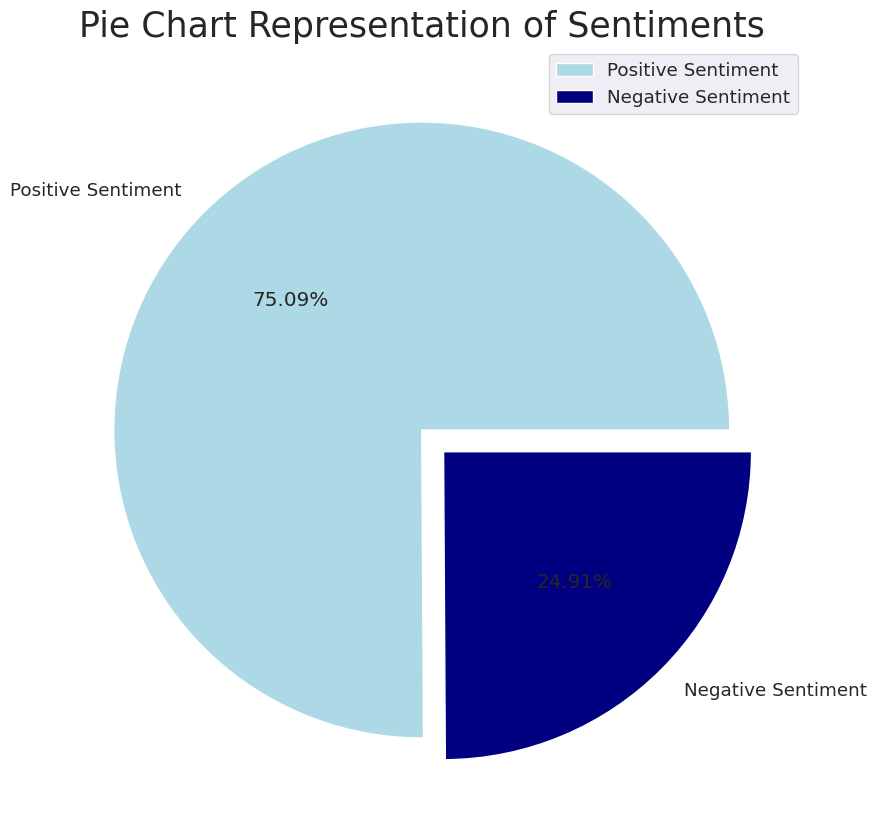

In [ ]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

<ul>
    <li style="font-size:150%;">This Pie Chart represents the Sentiments of the Reviews.</li>
<ul>

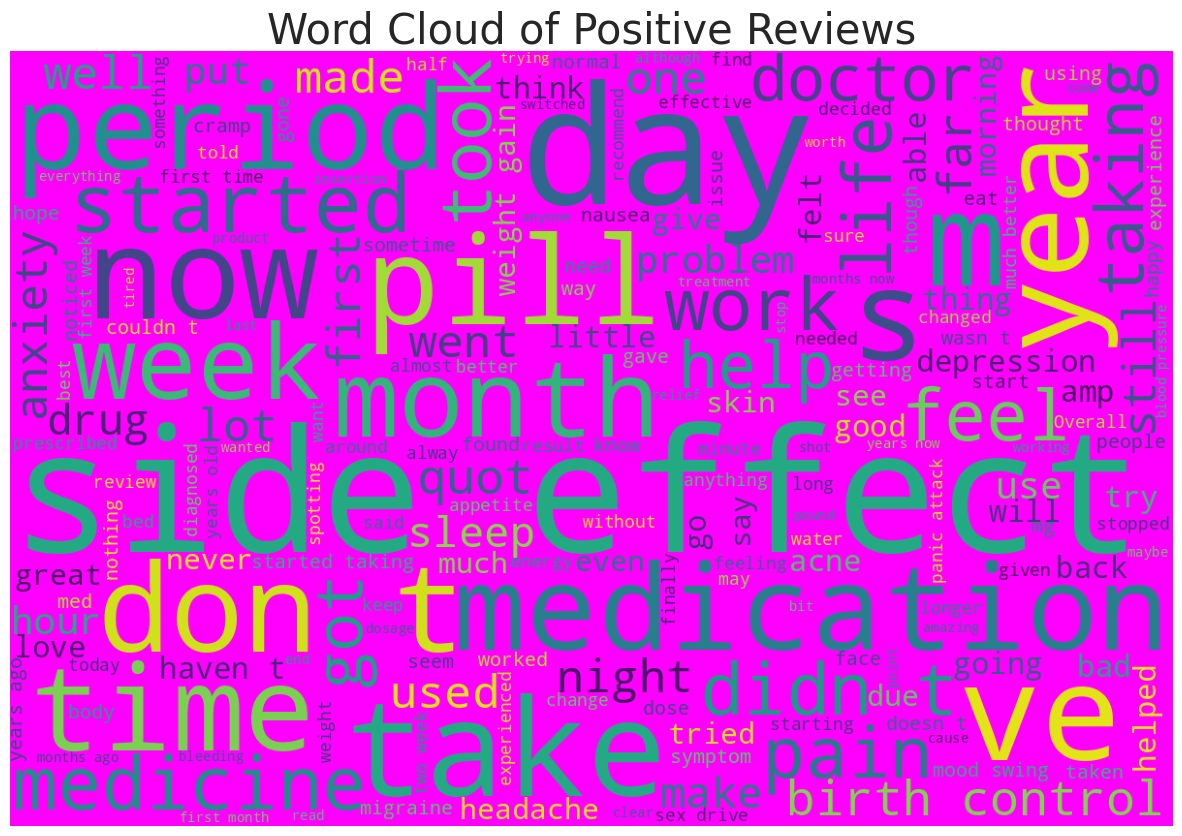

In [ ]:

# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the Positive Sentiments.</li>
<ul>

<ul>
    <li style="font-size:150%;">This is a word cloud for the Negative Sentiments.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF REVIEWS BASED ON DATETIME</b></i></h1>

In [ ]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

In [ ]:
# looking at the no. of reviews in each of the months

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['month'], palette ='tab10')
plt.title('The No. of Reviews each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

<ul>
    <li style="font-size:150%;">The is a Bar graph that shows the number of reviews in the data set per month.</li>
<ul>

In [ ]:
# looking at the no. of reviews in each of the day

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['day'], palette ='colorblind')
plt.title('The No. of Reviews each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

<ul>
    <li style="font-size:150%;">The is a Bar graph that shows the number of reviews in the data set per day.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF USEFUL COUNT</b></i></h1>

In [ ]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

<ul>
    <li style="font-size:150%;">This shows the distribution of the useful Counts in the data set.</li>
<ul>

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><i><b style="color:orange;">DATA PREPROCESSING / FEATURE ENGINEERING</b></i></h1></center>

In [ ]:
def review_clean(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [ ]:
data['review_clean'] = review_clean(data['review'])

<ipython-input-7-d74b7fad3449>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
<ipython-input-7-d74b7fad3449>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
<ipython-input-7-d74b7fad3449>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-d74b7fad3449>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
<ipython-input-7-d74b7fad3449>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

<ul>
    <li style="font-size:150%;">I have used textblob module to give the sentiment polarity of the review. This polarity is given to both the cleaned and uncleaned review</li>
<ul>

In [ ]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [ ]:
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,side effect take combin bystol 5 mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,use take anoth oral contracept 21 pill cycl ha...


In [ ]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [ ]:
data['sentiment'] = sentiment(data['review'])

In [ ]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [ ]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_ss'] = review_clean(data['review'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [ ]:
data = data.dropna(how="any", axis=0)

In [ ]:

#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

<ul>
    <li style="font-size:150%;">The new features engineered are 'count_word' which is the number of words in each review, 'count_unique_word' which is the number of the unique words in the reviews. 'count_letters' is the letter count, 'punctuation_count' is the punctuation count, 'count_words_upper' is the upper case word count,'count_words_title' is the title case word counts, 'count_stopwords' is the number of stop words in the review, and the 'mean_word_len' is the average length of the words in the review. The date is also divided into three columns which are day, month and year for separate features for training.</li>
<ul>

In [ ]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'review_clean', 'sentiment', 'sentiment_clean',
       'review_clean_ss', 'sentiment_clean_ss', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_words_upper', 'count_words_title', 'count_stopwords',
       'mean_word_len'],
      dtype='object')

<h1 style="font-size:180%; color:orange;"><i><b>CORRELATION MATRIX</b></i></h1>

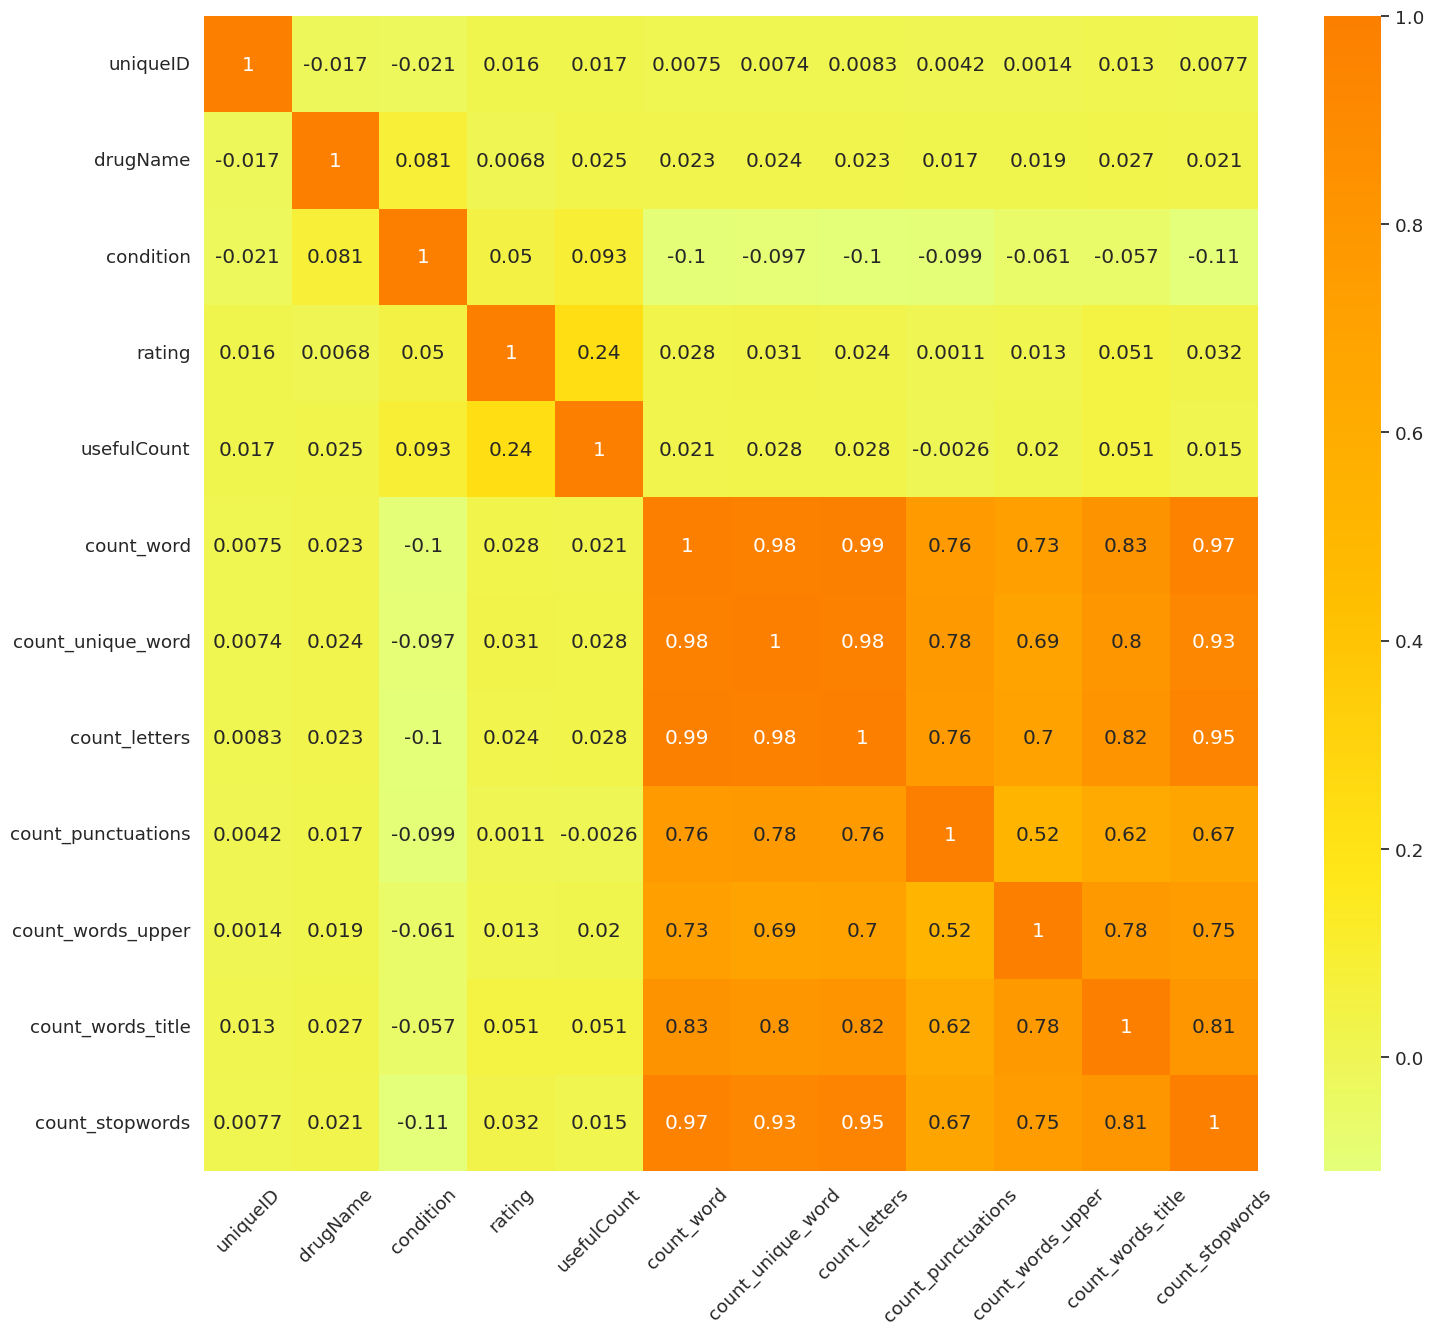

In [ ]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

<ul>
    <li style="font-size:150%;">Correlation Heatmap is plotted using seaborn which contains all the new features engineered and the old features.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>LABEL ENCODING</b></i></h1>

In [ ]:

# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

<ul>
    <li style="font-size:150%;">The Label Encoder is used to change the categorical values of Drug Names and the conditions in to numerical values for the machine learning modelling. There are 3,667 unique drugs in the dataset that's why One hot encoder is not used as it would generate 3,667 new features and it would be very computationally expensive.</li>
<ul>

# LSTM

In [ ]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean,sentiment,...,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,206461,3421,480,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1.0,side effect take combin bystol 5 mg fish oil,0.000000,...,it has no side effect i take it in combination...,0.000000,17,16,76,3,1,6,7,3.529412
1,95260,1536,80,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1.0,son halfway fourth week intuniv becam concern ...,0.168333,...,my son is halfway through his fourth week of i...,0.168333,141,97,716,23,2,13,69,4.085106
2,92703,1983,175,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,1.0,use take anoth oral contracept 21 pill cycl ha...,0.067210,...,i used to take another oral contraceptive whic...,0.067210,134,89,714,34,6,15,59,4.335821
3,138000,2446,175,"""This is my first time using any form of birth...",8,3-Nov-15,10,1.0,first time use form birth control im glad went...,0.179545,...,this is my first time using any form of birth ...,0.179545,91,58,432,15,4,9,45,3.758242
4,35696,553,593,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1.0,suboxon complet turn life around feel healthie...,0.194444,...,suboxone has completely turned my life around ...,0.194444,125,85,670,28,7,15,60,4.368000


In [ ]:
features = data[['condition', 'usefulCount', 'sentiment',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

In [ ]:
from keras.preprocessing.text import Tokenizer

# Instantiate a Tokenizer object
tokenizer = Tokenizer()

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(data['review_clean'])

# Get the size of the resulting vocabulary
vocab_size = len(tokenizer.word_index) + 1

# Convert the text data to sequences
X_text = tokenizer.texts_to_sequences(data['review_clean'])

# Get the maximum sequence length
max_length = max(len(seq) for seq in X_text)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_text = pad_sequences(X_text, padding='post', maxlen=max_length)

In [ ]:
X_features = features
y = data['Review_Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_text_train, X_text_test, X_features_train, X_features_test, y_train, y_test = train_test_split(
    X_text, X_features, y, test_size=0.2, random_state=42)
X_text_train, X_text_val, X_features_train, X_features_val, y_train, y_val = train_test_split(
    X_text_train, X_features_train, y_train, random_state=42)

In [ ]:
from keras import Sequential
from keras.layers import LSTM, Dense, Input, concatenate
from keras.models import Model

X_text_train = np.expand_dims(X_text_train, axis=2)
X_text_val = np.expand_dims(X_text_val, axis=2)
X_text_test = np.expand_dims(X_text_test, axis=2)

# Define the LSTM model architecture with multiple inputs
text_input = Input(shape=(max_length, 1))
features_input = Input(shape=(X_features_train.shape[1],))  # Updated input shape

text_embedding = LSTM(128)(text_input)
combined_features = concatenate([text_embedding, features_input])
dense_layer = Dense(64, activation='relu')(combined_features)
output = Dense(1, activation='sigmoid')(dense_layer)  # Assuming binary sentiment classification

model = Model(inputs=[text_input, features_input], outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 979, 1)]     0           []                               
                                                                                                  
 lstm_5 (LSTM)                  (None, 128)          66560       ['input_7[0][0]']                
                                                                                                  
 input_8 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 140)          0           ['lstm_5[0][0]',                 
                                                                  'input_8[0][0]']            

In [ ]:
import tensorflow as tf

print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on GPU...


In [ ]:
X_features.shape

(213869, 12)

In [ ]:
X_features_val.shape

(42774, 12)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_text_train, X_features_train], y_train, batch_size=32, epochs=10, validation_data=([X_text_val, X_features_val], y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_text_test, X_features_test], y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

ValueError: ignored

<h1 style="font-size:180%; color:orange;"><i><b>LIGHT GBM MODEL

<ul>
    <li style="font-size:150%;">LightGBM is a gradient boosting framework that uses treebased learning algorithms. It's designed to be distributed and efficient. It has many advantages like faster training speed and higher efficiency, lower memory usage, better accuracy and support of parallel and GPU learning, since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit.</li>
<ul>

In [ ]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
print(data.head())

   uniqueID  drugName  condition  \
0    206461      3421        480   
1     95260      1536         80   
2     92703      1983        175   
3    138000      2446        175   
4     35696       553        593   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount                                       review_clean  sentiment  \
0           27       side effect take combin bystol 5 mg fish oil   0.000000   
1          192  son halfway fourth week intuniv becam concern ...   0.168333   
2           17  use take anoth oral contracept 21 pill cycl ha...   0.067210   
3           

In [ ]:
print(data.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'review_clean', 'sentiment', 'sentiment_clean',
       'review_clean_ss', 'sentiment_clean_ss', 'Review_Sentiment'],
      dtype='object')


In [ ]:
# Defining Features and splitting the data as train and test set

features = data[['condition', 'usefulCount', 'sentiment',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (160401, 12)
The Test set size  (53468, 12)


<ul>
    <li style="font-size:150%;">70% of the dataset is used for the training and the rest of the data i.e. 30% is used for the testing purpose. The shape of the training set is (149708, 15) and the shape of  the test set is (64161, 15).</li>
<ul>

In [ ]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.1,
        num_leaves=30,
        subsample=.9,
        max_depth=5,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

NameError: ignored

<ul>
    <li style="font-size:150%;">The Confusion Matrix for the LGBM model is given above, it can be seen that the accuracy of the LGBM is 0.9014 (90%).</li>
<ul>

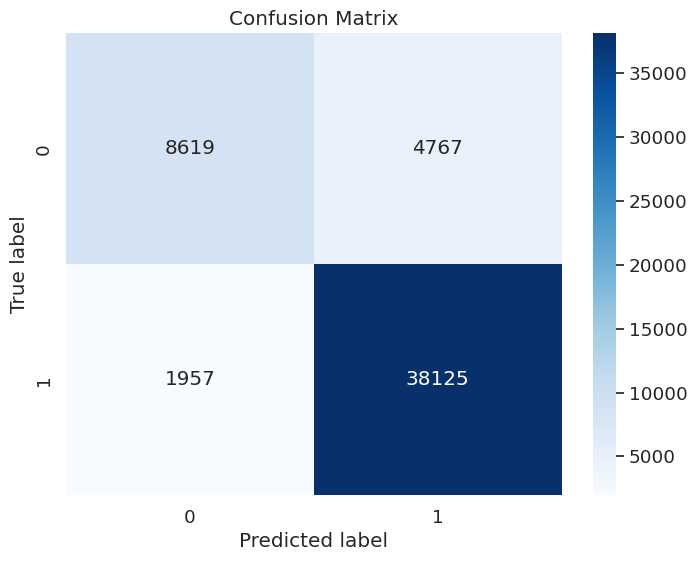

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = [8, 6]
# assuming y_true and y_pred are already defined
cm = confusion_matrix(y_test, predictions)

# create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

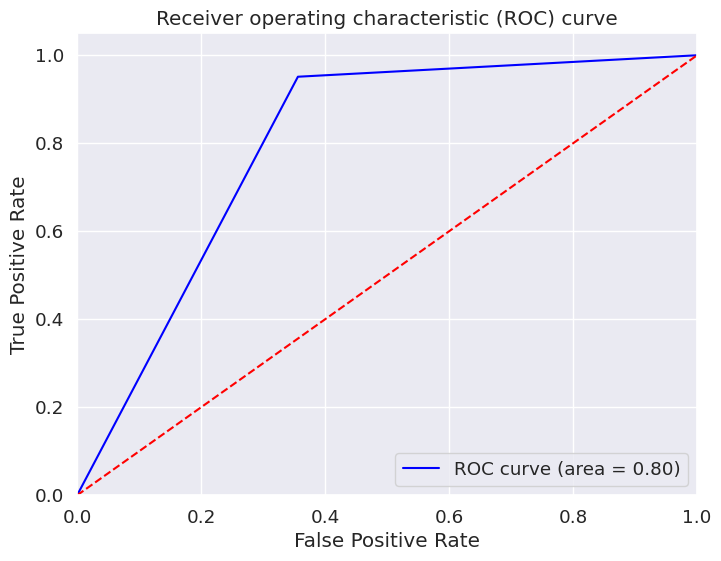

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_true = y_test
y_score = predictions
# assuming y_true and y_score are already defined
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = predictions

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * ((precision * recall) / (precision + recall))


data = [accuracy, precision, recall, f1_score]
data_name = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for name, i in zip(data_name, data):
    print(name, ' = ', i)

Accuracy  =  0.8742425375925788
Precision  =  0.8888603935465821
Recall  =  0.9511750910633202
F1-Score  =  0.9189625665871237


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * ((precision * recall) / (precision + recall))


data = [accuracy, precision, recall, f1_score]
data_name = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for name, i in zip(data_name, data):
    print(name, ' = ', i)

Accuracy  =  0.8923655270442133
Precision  =  0.905019232130637
Recall  =  0.9568384811137168
F1-Score  =  0.9302077396039243


In [ ]:
Accuracy  =  0.9157252936335752
Precision  =  0.9395538498440873
Recall  =  0.9403056733616068
f1_score  =  0.9399296112621981
data_2 = [Accuracy, Precision, Recall, f1_score]

In [ ]:
performance = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [ ]:
performance.loc['LSTM'] = data_2
performance.loc['LGBM'] = data

In [ ]:
print(performance)

      Accuracy  Precision    Recall  F1-Score
LSTM  0.915725   0.939554  0.940306  0.939930
LGBM  0.892366   0.905019  0.956838  0.930208


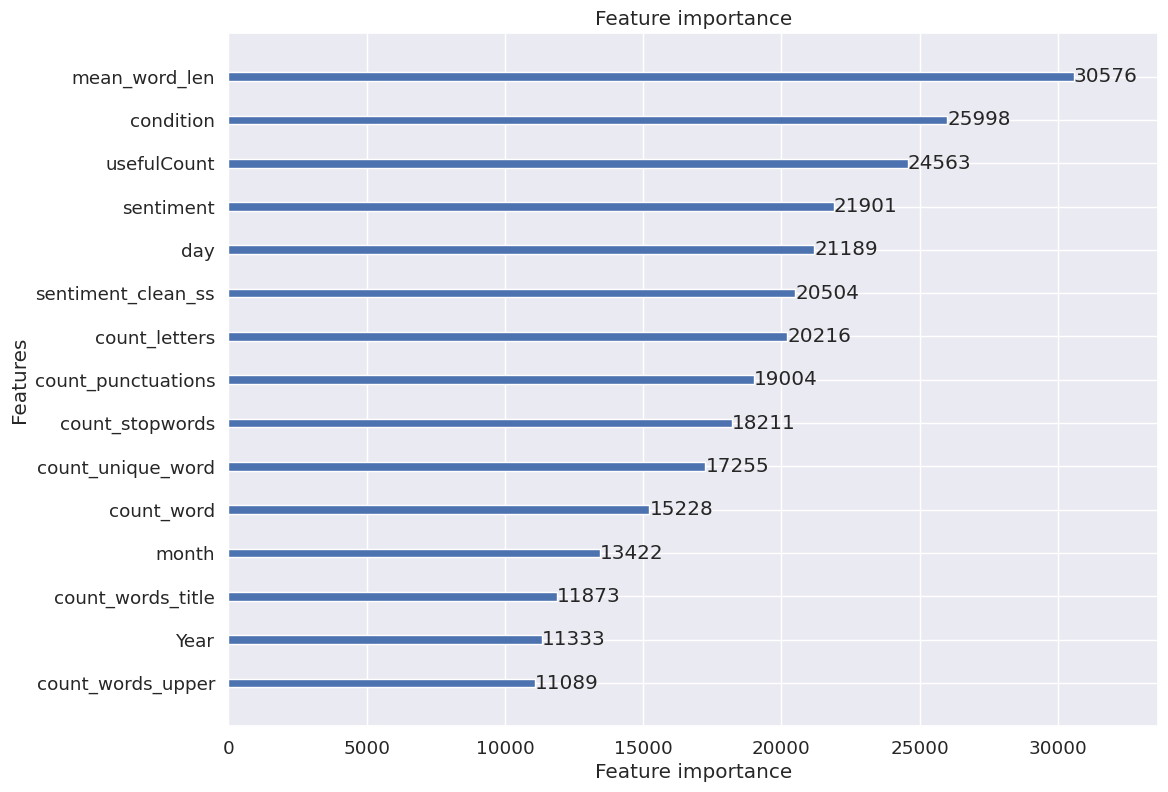

In [ ]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

<ul>
    <li style="font-size:150%;">Above figure depicts the feature importance plot using the LightGBM. It can be inferred that the most importance feature is the mean word length and after that the condition of the patient. The least important feature of them all is the upper-case word count.</li>
<ul>